# Libs

In [1]:
### Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import joblib

%matplotlib inline

# Funções

In [2]:
def calcula_outliers(serie):

    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    
    menor_valor = q1- 1.5 * (q3-q1)
    maior_valor = q3+ 1.5 * (q3-q1)
    
    if ((serie.max() > maior_valor) | 
        (serie.min() < menor_valor)):
        
        return [menor_valor, maior_valor]
        
    return None

# Dados

In [3]:
dados = pd.read_excel('data.xls')
dados.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   int64         
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

## Transformando dados

In [5]:
# somando a quantidade de comodos
dados['rooms'] = dados['bedrooms'] + dados['bathrooms']
dados = dados[dados['price']>10000]

In [6]:
dados.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'rooms'],
      dtype='object')

In [7]:
# criando indicador de idade do imóvel
ano_atual = datetime.date.today().year

dados['age'] = dados.apply(lambda x: ano_atual - x['yr_built']
                           if x['yr_renovated'] == 0
                           else ano_atual - x['yr_renovated'], axis=1)

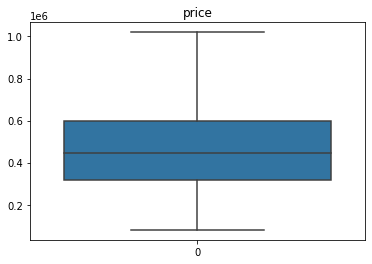

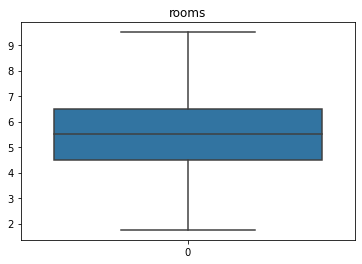

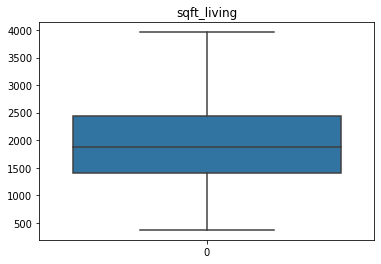

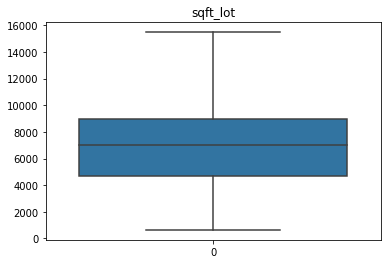

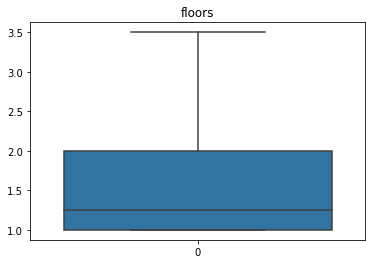

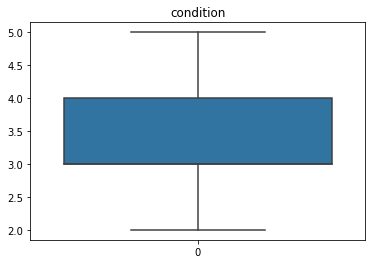

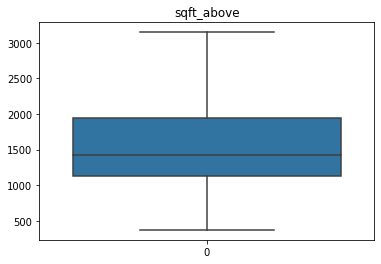

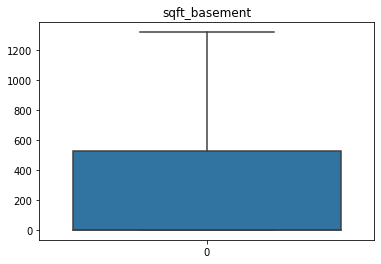

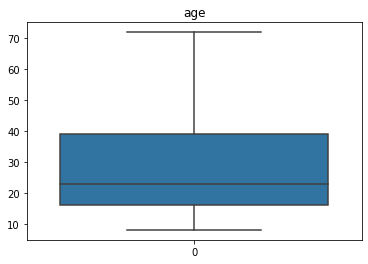

In [8]:
cols = ['price', 'rooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'sqft_above',
       'sqft_basement', 'age']

#removendo outliers
for col in cols:
    while True:
        limites = calcula_outliers(dados[col])
        if limites:
            dados = dados[((dados[col] >= limites[0]) &
                       (dados[col] <= limites[1]))]
        else:
            break

    sns.boxplot(dados[col])
    plt.title(col)
    plt.show()

# Treinando modelo de predição

In [9]:
# features
X = dados[['rooms','view', 'sqft_living','floors', 'condition', 'age', 
           'yr_built', 'sqft_basement']]

#target
y = dados[['price']]

In [10]:
# separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# montando modelo de regressão linear
lm = LinearRegression()
lm.fit(X_train, y_train)
ỹ = lm.predict(X_test)

## Avaliando modelo

Text(0, 0.5, 'ỹ predito')

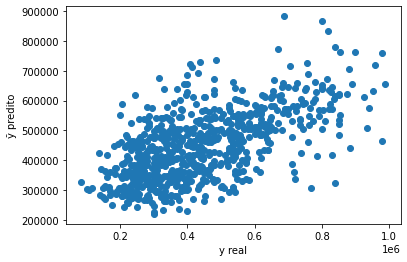

In [11]:
# visualização do predito vs real
plt.scatter(y_test, ỹ)
plt.xlabel('y real')
plt.ylabel('ỹ predito')

In [12]:
# visualizando métricas
print('MAE:', metrics.mean_absolute_error(y_test, ỹ))
print('MSE:', metrics.mean_squared_error(y_test, ỹ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ỹ)))
print('R:', metrics.r2_score(y_test,ỹ))

MAE: 116337.96109479813
MSE: 21040427675.305035
RMSE: 145053.18912490355
R: 0.36494166480526335


## Exportando modelo

In [13]:
#Persistindo modelo em disco.
joblib.dump(lm, 'model.pkl')

['model.pkl']

In [14]:
dados['condition'].value_counts()

3    2015
4     773
5     175
2       7
Name: condition, dtype: int64